In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score




from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
import math

C:\Users\ulyss\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Logistic Regression
NBA_data = pd.read_csv('Final-DataFrames/Final_Injury.csv')

# NBA columns 
NBA_model = NBA_data.dropna()
NBA_model.head()

,Unnamed: 0,Player,Team,Age,Height,Weight,GP,Injury Status,MP,Pos
0,0,Aaron Gordon,ORL,23.0,6.75,220.0,78.0,Injured,32.9,PF
2,2,Abdel Nader,OKC,25.0,6.50,225.0,61.0,Not Injured,10.9,SF
3,3,Al Horford,BOS,33.0,6.83,245.0,68.0,Injured,31.6,C
4,4,Al-Farouq Aminu,POR,28.0,6.75,220.0,81.0,Not Injured,30.0,PF
5,5,Alan Williams,BKN,26.0,6.67,265.0,5.0,Injured,14.0,PF


In [3]:
# 1 = injured
# 0 = not injured
Encoded_df = pd.get_dummies(NBA_model, columns=['Injury Status'])[['Player', 'Team', 'Age', 'Height', 'Weight','GP', 'Injury Status_Injured','MP']]
Encoded_df['BMI'] = (Encoded_df['Weight'] / ((Encoded_df['Height'] * 12 )** 2)) * 703
Encoded_df.head()

,Player,Team,Age,Height,Weight,GP,Injury Status_Injured,MP,BMI
0,Aaron Gordon,ORL,23.0,6.75,220.0,78.0,1,32.9,23.572626
2,Abdel Nader,OKC,25.0,6.50,225.0,61.0,0,10.9,25.998521
3,Al Horford,BOS,33.0,6.83,245.0,68.0,1,31.6,25.639970
4,Al-Farouq Aminu,POR,28.0,6.75,220.0,81.0,0,30.0,23.572626
5,Alan Williams,BKN,26.0,6.67,265.0,5.0,1,14.0,29.079507


## Import Our Model Functions From Our Python File

In [4]:
from function import train_test, logistic_model, knn_model, random_for

## Create Train and Test Variables Based On The DataFrame and Columns of Interest

In [5]:
columns = ['Age', 'Height', 'Weight','GP', 'MP', 'BMI']
X_tn, X_tt, y_tn, y_tt = train_test(Encoded_df, columns)

# Create Logistic Model

In [6]:
logistic_model(X_tn, X_tt, y_tn, y_tt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---------------------------------
X_test Prediction: 
---------------------------------
[0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1]
---------------------------------
Training Data Score: 0.6438356164383562
Testing Data Score: 0.7040816326530612


(0.6438356164383562, 0.7040816326530612)

# Create Knn Model

k: 1, Train/Test Score: 1.000/0.663
k: 3, Train/Test Score: 0.767/0.673
k: 5, Train/Test Score: 0.688/0.622
k: 7, Train/Test Score: 0.678/0.582
k: 9, Train/Test Score: 0.623/0.633
k: 11, Train/Test Score: 0.634/0.633
k: 13, Train/Test Score: 0.634/0.673
k: 15, Train/Test Score: 0.664/0.673
k: 17, Train/Test Score: 0.637/0.694
k: 19, Train/Test Score: 0.610/0.714
k: 21, Train/Test Score: 0.623/0.684
k: 23, Train/Test Score: 0.613/0.684
k: 25, Train/Test Score: 0.613/0.643
k: 27, Train/Test Score: 0.613/0.684
k: 29, Train/Test Score: 0.603/0.694
k: 31, Train/Test Score: 0.589/0.724
k: 33, Train/Test Score: 0.592/0.735
k: 35, Train/Test Score: 0.589/0.704
k: 37, Train/Test Score: 0.592/0.714
k: 39, Train/Test Score: 0.586/0.704
k: 41, Train/Test Score: 0.596/0.714
k: 43, Train/Test Score: 0.579/0.745
k: 45, Train/Test Score: 0.592/0.714
k: 47, Train/Test Score: 0.586/0.724
k: 49, Train/Test Score: 0.582/0.694


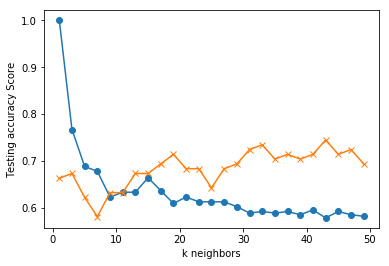

------------------------------------
k: 23, Train/Test Score: 0.613/0.684
-------------------------------------
Confusion Matrix: 
[[ 0 29]
 [ 0 69]]
-------------------------------------
F1 Score: 
0.8263473053892215
-------------------------------------
Accuracy Score: 
0.7040816326530612


In [7]:
knn_model(X_tn, X_tt, y_tn, y_tt, 23)

# Create Random Forest Model

In [8]:
random_for(X_tn, X_tt, y_tn, y_tt, Encoded_df)

Number of Predictions: 98
-------------------------------------
Predicted as injured:
(54, 7)
Predicted as not injured
(44, 7)


In [9]:
trn_scores = []
tst_scores = []

for i in range(1, 10):
    X_tn, X_tt, y_tn, y_tt = train_test(Encoded_df, columns)
    trn, tst = logistic_model(X_tn, X_tt, y_tn, y_tt)
    trn_scores.append(trn)
    tst_scores.append(tst)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---------------------------------
X_test Prediction: 
---------------------------------
[1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
---------------------------------
Training Data Score: 0.6643835616438356
Testing Data Score: 0.6020408163265306
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---------------------------------
X_test Prediction: 
---------------

In [10]:
import statistics
print(f'The Mean of our list of test scores is {statistics.mean(tst_scores)}')
print(f'The Standard Deviation of our list of test scores is {statistics.stdev(tst_scores)}')

The Mean of our list of test scores is 0.6519274376417233
The Standard Deviation of our list of test scores is 0.031634481696833784
